# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Jesselyn Mu
- **Email:** mujesselyn@gmail.com
- **ID Dicoding:** jesselynmu12

## Pertanyaan Bisnis

* Kota mana yang mencapai tingkat revenue penjualan tertinggi dan terendah?
* Siapa pelanggan yang menghasilkan revenue terbesar dan terkecil?
* Produk apa yang yang mempunyai penjualan terbanyak dan penjualan tersedikit?
* Produk apa yang yang mempunyai revenue penjualan tertinggi dan penjualan terendah?
* Produk apa yang mendapatkan rating tinggi dan produk apa yang mendapat rating rendah?
* Berapa banyak pesanan yang dikirim sesuai estimasi dan berapa banyak yang melewati estimasi?
* Metode pembayaran apa yang paling sering digunakan oleh pembeli, dan berapa total pendapatan yang dihasilkan?


## Import Packages / Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


## Data Wrangling

### Gathering Data

In [ ]:
! kaggle datasets download -d olistbr/brazilian-ecommerce
! unzip brazilian-ecommerce.zip

 77% 33.0M/42.6M [00:00<00:00, 110MB/s] 
100% 42.6M/42.6M [00:00<00:00, 112MB/s]
Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [ ]:
customer_df = pd.read_csv("/content/olist_customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_df = pd.read_csv("/content/olist_geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_df = pd.read_csv("/content/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv("/content/olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv("/content/olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_df = pd.read_csv("/content/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
products_df = pd.read_csv("/content/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_df = pd.read_csv("/content/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
product_name_df = pd.read_csv("/content/product_category_name_translation.csv")
product_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Menilai tabel `customer_df`



In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `order_item_df`

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `order_payments_df`

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `order_reviews_df`

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

#### Menilai tabel `products_df`

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

#### Membersihkan tabel `geolocation_df`

**To Do :**
* Menyamakan format penulisan pada kolom `geolocation_city`

In [ ]:
geolocation_city = geolocation_df['geolocation_city'].unique()
print(geolocation_city)

geolocation_df['geolocation_city'].value_counts()

['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']


sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: geolocation_city, Length: 8011, dtype: int64

In [ ]:
import re

def cleaned_text(text):
    cleaned = re.sub(r'[ãââàáä]', 'a', text)
    cleaned = re.sub(r'[íîì]', 'i', text)
    cleaned = re.sub(r'[úûùü]', 'u', text)
    cleaned = re.sub(r'[éêèë]', 'e', text)
    cleaned = re.sub(r'[óõôòö]', 'o', text)
    cleaned = re.sub(r'[ç]', 'c', text)
    return cleaned

geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(cleaned_text)

In [ ]:
for i in geolocation_df['geolocation_zip_code_prefix'].unique():
    city = geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == i]['geolocation_city'].mode().values[0]
    geolocation_df.loc[geolocation_df['geolocation_zip_code_prefix'] == i, 'geolocation_city'] = city

In [ ]:
geolocation_city = geolocation_df['geolocation_city'].unique()
print(geolocation_city)

geolocation_df['geolocation_city'].value_counts()

['sao paulo' 'são paulo' 'osasco' ... 'floriano peixoto' 'erebango'
 'santa cecilia do sul']


sao paulo            160680
rio de janeiro        62152
belo horizonte        27806
curitiba              16594
porto alegre          13522
                      ...  
catuni                    1
adao colares              1
vale dos vinhedos         1
itamarati norte           1
nova santa luzia          1
Name: geolocation_city, Length: 5824, dtype: int64

In [ ]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].str.title()
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP
2,1046,-23.546129,-46.642951,Sao Paulo,SP
3,1041,-23.544392,-46.639499,Sao Paulo,SP
4,1035,-23.541578,-46.641607,Sao Paulo,SP


#### Membersihkan tabel `customer_df`

**To Do :**
* Menyamakan format penulisan pada kolom `customer_city`



In [ ]:
customer_city = customer_df['customer_city'].unique()
print(customer_city)

customer_df['customer_city'].value_counts()

['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']


sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [ ]:
customer2_df = customer_df.merge(geolocation_df[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(),
                                left_on='customer_zip_code_prefix',
                                right_on='geolocation_zip_code_prefix',
                                how='left')

customer2_df['geolocation_city'].fillna(customer2_df['customer_city'].str.title(), inplace=True)
customer2_df['customer_city'] = customer2_df['geolocation_city']

customer2_df.drop(columns=['geolocation_city', 'geolocation_zip_code_prefix'], inplace=True)

customer2_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [ ]:
customer_city = customer2_df['customer_city'].unique()
print(customer_city)

customer2_df['customer_city'].value_counts()

['Franca' 'Sao Bernardo Do Campo' 'Sao Paulo' ... 'Monte Bonito'
 'Sao Rafael' 'Eugenio De Castro']


Sao Paulo               15535
Rio De Janeiro           6882
Belo Horizonte           2773
Brasilia                 2120
Curitiba                 1521
                        ...  
Central                     1
Nova Independencia          1
Cha De Alegria              1
Sao Joao Do Itaperiu        1
Eugenio De Castro           1
Name: customer_city, Length: 4099, dtype: int64

#### Membersihkan tabel `order_items_df`

**To Do :**
* Merubah tipe data pada kolom `shipping_limit_date`

In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `order_payments_df`
**To Do :**
* Menghapus baris pada kolom `payment_installments` yang bernilai 0
* Menghapus baris pada kolom `payment_type` yang bernilai not_defined
* Menyamakan format penulisan pada kolom `payment_type`


In [ ]:
order_payments_df[order_payments_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [ ]:
order_payments_df = order_payments_df[order_payments_df['payment_installments']!=0]

In [ ]:
order_payments_df[order_payments_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [ ]:
order_payments_df[order_payments_df['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [ ]:
order_payments_df = order_payments_df[order_payments_df['payment_type']!="not_defined"]

In [ ]:
order_payments_df[order_payments_df['payment_type'] == "not_defined"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [ ]:
order_payments_df['payment_type'] = order_payments_df['payment_type'].apply(lambda x: " ".join([s.capitalize() if s.lower() != "and" else s for s in x.split("_")]))
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit Card,2,128.45


#### Membersihkan tabel `order_reviews_df`

**To Do :**
* Menghapus kolom `review_comment_tittle` dan `review_comment_message`
* Merubah tipe data pada kolom `review_creation_date` dan `review_answer_timestamp`

In [ ]:
column_deleted = ['review_comment_title', 'review_comment_message']
order_reviews_df = order_reviews_df.drop(columns = column_deleted)
order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### Membersihkan tabel `orders_df`

**To Do :**
* Merubah tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date`

In [ ]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Membersihkan tabel `products_df`

**To Do :**
* Menghapus seluruh baris yang bernilai Null
* Menghapus baris pada kolom `product_weight_g` yang bernilai 0
* Menyamakan format penulisan pada kolom `product_category_name`

In [ ]:
products_df.dropna(inplace = True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
products_df[products_df['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [ ]:
products_df = products_df[products_df['product_weight_g']!=0]

In [ ]:
products_df[products_df['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [ ]:
products2_df = products_df.merge(product_name_df[['product_category_name', 'product_category_name_english']].drop_duplicates(),
                                left_on = products_df['product_category_name'],
                                right_on = product_name_df['product_category_name'],
                                how='left')

products2_df['product_category_name_english'].fillna(products2_df['product_category_name_x'], inplace=True)
products2_df['product_category_name_x'] = products2_df['product_category_name_english']

products2_df.drop(columns=['key_0', 'product_category_name_y',
                          'product_category_name_english'], inplace=True)

products2_df = products2_df.rename(columns={'product_category_name_x':'product_category_name'})
products2_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
category_name = []
for i in range(0, len(products2_df["product_category_name"])):
  a = " ".join([s.capitalize() if s.lower() != "and" else s for s in products2_df["product_category_name"][i].split("_")])
  category_name.append(a)

products2_df["product_category_name"] = pd.DataFrame(category_name)
products2_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Membersihkan tabel `sellers_df`

**To Do :**
* Menyamakan format penulisan pada kolom `seller_city`

In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers2_df = sellers_df.merge(geolocation_df[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(),
                                left_on='seller_zip_code_prefix',
                                right_on='geolocation_zip_code_prefix',
                                how='left')

sellers2_df['geolocation_city'].fillna(sellers2_df['seller_city'].str.title(), inplace=True)
sellers2_df['seller_city'] = sellers2_df['geolocation_city']

sellers2_df.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city'], inplace=True)

sellers2_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi-Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


## Exploratory Data Analysis (EDA)

#### Explore `customer2_df` & `orders_df`

In [ ]:
merged_orcu_df = pd.merge(orders_df, customer2_df, on='customer_id', how='inner')
merged_orcu_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,Barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,Vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,Sao Goncalo Do Amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,Santo Andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,Sao Jose Dos Campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,Praia Grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,Nova Vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,Japuiba,RJ


In [ ]:
merged_orcu_df.groupby(by = "customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
Sao Paulo                  14979
Rio De Janeiro              6620
Belo Horizonte              2672
Brasilia                    2056
Curitiba                    1465
                           ...  
Dores De Guanhães              1
Douradina                      1
Doutor Camargo                 1
Doutor Mauricio Cardoso        1
Ressaquinha                    1
Name: customer_unique_id, Length: 4099, dtype: int64

#### Explore `orders_df`, `customer2_df`, & `order_payments_df`

In [ ]:
merged_df = pd.merge(merged_orcu_df, order_payments_df, on='order_id', how='inner')
merged_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,1,Credit Card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,3,Voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,2,Voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,Barreiras,BA,1,Boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,Vianopolis,GO,1,Credit Card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103876,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,Sao Jose Dos Campos,SP,1,Credit Card,3,85.08
103877,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,Praia Grande,SP,1,Credit Card,3,195.00
103878,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,Nova Vicosa,BA,1,Credit Card,5,271.01
103879,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,Japuiba,RJ,1,Credit Card,4,441.16


In [ ]:
total_payment_customer = merged_df.groupby('customer_id')['payment_value'].sum().reset_index().sort_values(by = 'payment_value', ascending = False)
total_payment_customer

,customer_id,payment_value
8546,1617b1357756262bfa56ab541c47bc16,13664.08
91979,ec5b2ba62e574342386871631fafd3fc,7274.88
77516,c6e2731c5b391845f6800c97401a43a9,6929.31
95118,f48d464a0baaea338cb25f816991ab1f,6922.21
24769,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
...,...,...
82101,d2c63ad286e3ca9dd69218008d61ff81,11.62
1742,046f890135acc703faff4c1fc0c2d73c,11.56
55140,8e4bd65db637116b6b68109e4df21b84,10.89
9456,184e8e8e48937145eb96c721ef1f0747,10.07


In [ ]:
total_payment_city = merged_df.groupby('customer_city')['payment_value'].sum().reset_index().sort_values(by = 'payment_value', ascending = False)
total_payment_city

,customer_city,payment_value
3577,Sao Paulo,2202752.46
3137,Rio De Janeiro,1161927.36
448,Belo Horizonte,421765.12
554,Brasilia,352457.03
1135,Curitiba,247392.48
...,...,...
3384,Santo Antonio Do Rio Abaixo,24.23
3774,Tamboara,24.09
1947,Jenipapo De Minas,22.58
2909,Polo Petroquimico De Triunfo,20.70


#### Explore `orders_df`

In [ ]:
orders_df['status_delivery'] = 'On Time'
orders_df.loc[orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date'], 'status_delivery'] = 'Late'

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,On Time


In [ ]:
status_delivery = orders_df.groupby(by = "status_delivery").order_id.nunique().sort_values(ascending=False)
status_delivery_df = pd.DataFrame({'status_delivery': status_delivery.index, 'count': status_delivery.values})
status_delivery_df.head()

,status_delivery,count
0,On Time,91614
1,Late,7827


#### Explore `order_items_df` & `products2_df`

In [ ]:
merged_orpu_df = pd.merge(order_items_df, products2_df, on='product_id', how='inner')
merged_orpu_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [ ]:
product_favorite = merged_orpu_df.groupby(by = "product_category_name").product_id.nunique().sort_values(ascending=False)
product_favorite_df = pd.DataFrame({'product_category_name': product_favorite.index, 'count': product_favorite.values})
product_favorite_df.head()

,product_category_name,count
0,Bed Bath Table,3025
1,Sports Leisure,2867
2,Furniture Decor,2657
3,Health Beauty,2444
4,Housewares,2335


#### Explore `orders_df`, `customer2_df`, `order_payments_df`, `order_items_df` & `products2_df`

In [ ]:
merged_all_df = pd.merge(merged_orpu_df, merged_df, on='order_id', how='inner')
merged_all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,Cool Stuff,58.0,598.0,...,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,Campos Dos Goytacazes,RJ,1,Credit Card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,Cool Stuff,58.0,598.0,...,2017-07-13 20:39:29,2017-07-26,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,Jatai,GO,1,Boleto,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,Cool Stuff,58.0,598.0,...,2018-06-04 18:34:26,2018-06-07,3419052c8c6b45daf79c1e426f9e9bcb,30720,Belo Horizonte,MG,1,Credit Card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,Cool Stuff,58.0,598.0,...,2017-08-09 21:26:33,2017-08-25,e7c828d22c0682c1565252deefbe334d,83070,Sao Jose Dos Pinhais,PR,1,Credit Card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,Cool Stuff,58.0,598.0,...,2017-08-24 20:04:21,2017-09-01,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,Conselheiro Lafaiete,MG,1,Credit Card,4,72.19


In [ ]:
total_payment_product = merged_all_df.groupby('product_category_name')['payment_value'].sum().reset_index().sort_values(by = 'payment_value', ascending = False)
total_payment_product

,product_category_name,payment_value
7,Bed Bath Table,1710872.33
43,Health Beauty,1657373.12
15,Computers Accessories,1585330.45
39,Furniture Decor,1430176.39
72,Watches Gifts,1429216.68
...,...,...
59,Pc Gamer,2174.43
46,Home Comfort 2,1710.54
11,Cds Dvds Musicals,1199.43
29,Fashion Childrens Clothes,785.67


#### Explore `orders_df`, `customer2_df`, `order_payments_df`, `order_items_df`, `products2_df`, & `order_reviews_df`

In [ ]:
merged_all2_df = pd.merge(merged_all_df, order_reviews_df, on='order_id', how='inner')
merged_all2_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,Cool Stuff,58.0,598.0,...,Campos Dos Goytacazes,RJ,1,Credit Card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,Cool Stuff,58.0,598.0,...,Jatai,GO,1,Boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,2017-07-14,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,Cool Stuff,58.0,598.0,...,Belo Horizonte,MG,1,Credit Card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,2018-06-05,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,Cool Stuff,58.0,598.0,...,Sao Jose Dos Pinhais,PR,1,Credit Card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,2017-08-10,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,Cool Stuff,58.0,598.0,...,Conselheiro Lafaiete,MG,1,Credit Card,4,72.19,426f43a82185969503fb3c86241a9535,5,2017-08-25,2017-08-28 00:51:18


In [ ]:
total_rating_product = merged_all2_df.groupby('product_category_name')['review_score'].mean().reset_index().sort_values(by = 'review_score', ascending = False)
total_rating_product

,product_category_name,review_score
11,Cds Dvds Musicals,4.642857
29,Fashion Childrens Clothes,4.500000
8,Books General Interest,4.438503
35,Flowers,4.419355
9,Books Imported,4.419355
...,...,...
57,Office Furniture,3.526791
62,Portateis Cozinha E Preparadores De Alimentos,3.266667
23,Diapers and Hygiene,3.256410
59,Pc Gamer,3.100000


In [ ]:
total_method = merged_all2_df.groupby('payment_type')['payment_value'].agg(['count', 'sum']).reset_index().sort_values(by='sum', ascending=False)
total_method = total_method.rename(columns={'count': 'total_usage', 'sum': 'total_payment'})
total_method

,payment_type,total_usage,total_payment
1,Credit Card,85279,15300996.13
0,Boleto,22517,3984334.56
3,Voucher,6163,396244.12
2,Debit Card,1663,250506.86


In [ ]:
merged_all3_df = pd.merge(merged_all2_df, orders_df, on='order_id', how='inner')

merged_all3_df.drop(columns=['customer_id_y', 'order_status_y',
                          'order_purchase_timestamp_y', 'order_approved_at_y',
                          'order_delivered_carrier_date_y', 'order_delivered_customer_date_y',
                          'order_estimated_delivery_date_y'], inplace=True)

merged_all3_df = merged_all3_df.rename(columns={'customer_id_x':'customer_id',
                                                'order_status_x':'order_status',
                                                'order_purchase_timestamp_x':'order_purchase_timestamp',
                                                'order_approved_at_x':'order_approved_at',
                                                'order_delivered_carrier_date_x':'order_delivered_carrier_date',
                                                'order_delivered_customer_date_x':'order_delivered_customer_date',
                                                'order_estimated_delivery_date_x':'order_estimated_delivery_date'})

merged_all3_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,status_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,Cool Stuff,58.0,598.0,...,RJ,1,Credit Card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21,2017-09-22 10:57:03,On Time
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,Cool Stuff,58.0,598.0,...,GO,1,Boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,2017-07-14,2017-07-17 12:50:07,On Time
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,Cool Stuff,58.0,598.0,...,MG,1,Credit Card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,2018-06-05,2018-06-06 21:41:12,On Time
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,Cool Stuff,58.0,598.0,...,PR,1,Credit Card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,2017-08-10,2017-08-13 03:35:17,On Time
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,Cool Stuff,58.0,598.0,...,MG,1,Credit Card,4,72.19,426f43a82185969503fb3c86241a9535,5,2017-08-25,2017-08-28 00:51:18,On Time


In [ ]:
merged_all3_df.to_csv('all_df.csv', index=False)

# Visualization

#### Kota mana yang mencapai tingkat revenue penjualan tertinggi dan terendah?

In [ ]:
total_payment_city.head(10)

,customer_city,payment_value
3577,Sao Paulo,2202752.46
3137,Rio De Janeiro,1161927.36
448,Belo Horizonte,421765.12
554,Brasilia,352457.03
1135,Curitiba,247392.48
2945,Porto Alegre,224731.42
3229,Salvador,218071.50
701,Campinas,216248.43
1518,Guarulhos,165121.99
2450,Niteroi,139996.99


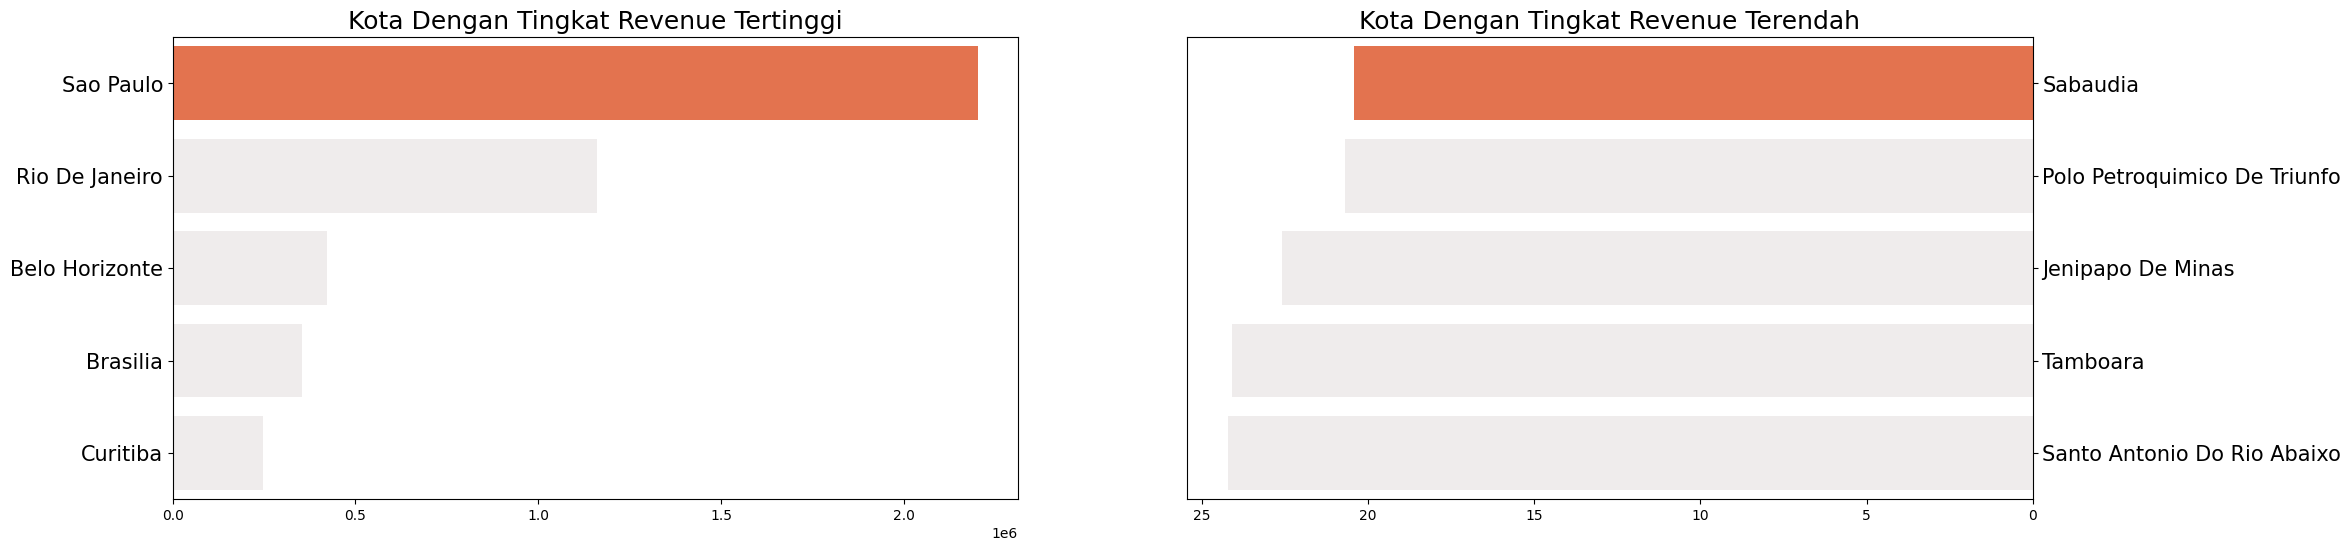

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FC6736", "#EFECEC", "#EFECEC", "#EFECEC", "#EFECEC"]

sns.barplot(x="payment_value", y="customer_city", data=total_payment_city.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kota Dengan Tingkat Revenue Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="payment_value", y="customer_city", data=total_payment_city.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kota Dengan Tingkat Revenue Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

**Finding :**
Berdasarkan grafik diatas, dapat disimpulkan bahwa kota **Sao Paulo** memiliki jumlah revenue tertinggi dengan nilai sebesar **2,202,752.46**. Lalu, untuk kota yang memiliki jumlah revenue terendah adalah kota **Sabaudia** yang memiliki nilai revenue sebesar **20.42**.

#### Siapa pelanggan yang menghasilkan revenue terbesar dan terkecil?

In [ ]:
total_payment_customer.head(10)

,customer_id,payment_value
8546,1617b1357756262bfa56ab541c47bc16,13664.08
91979,ec5b2ba62e574342386871631fafd3fc,7274.88
77516,c6e2731c5b391845f6800c97401a43a9,6929.31
95118,f48d464a0baaea338cb25f816991ab1f,6922.21
24769,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
2065,05455dfa7cd02f13d132aa7a6a9729c6,6081.54
86902,df55c14d1476a9a3467f131269c2477f,4950.34
87391,e0a2412720e9ea4f26c1ac985f6a7358,4809.44
14281,24bbf5fd2f2e1b359ee7de94defc4a15,4764.34
23930,3d979689f636322c62418b6346b1c6d2,4681.78


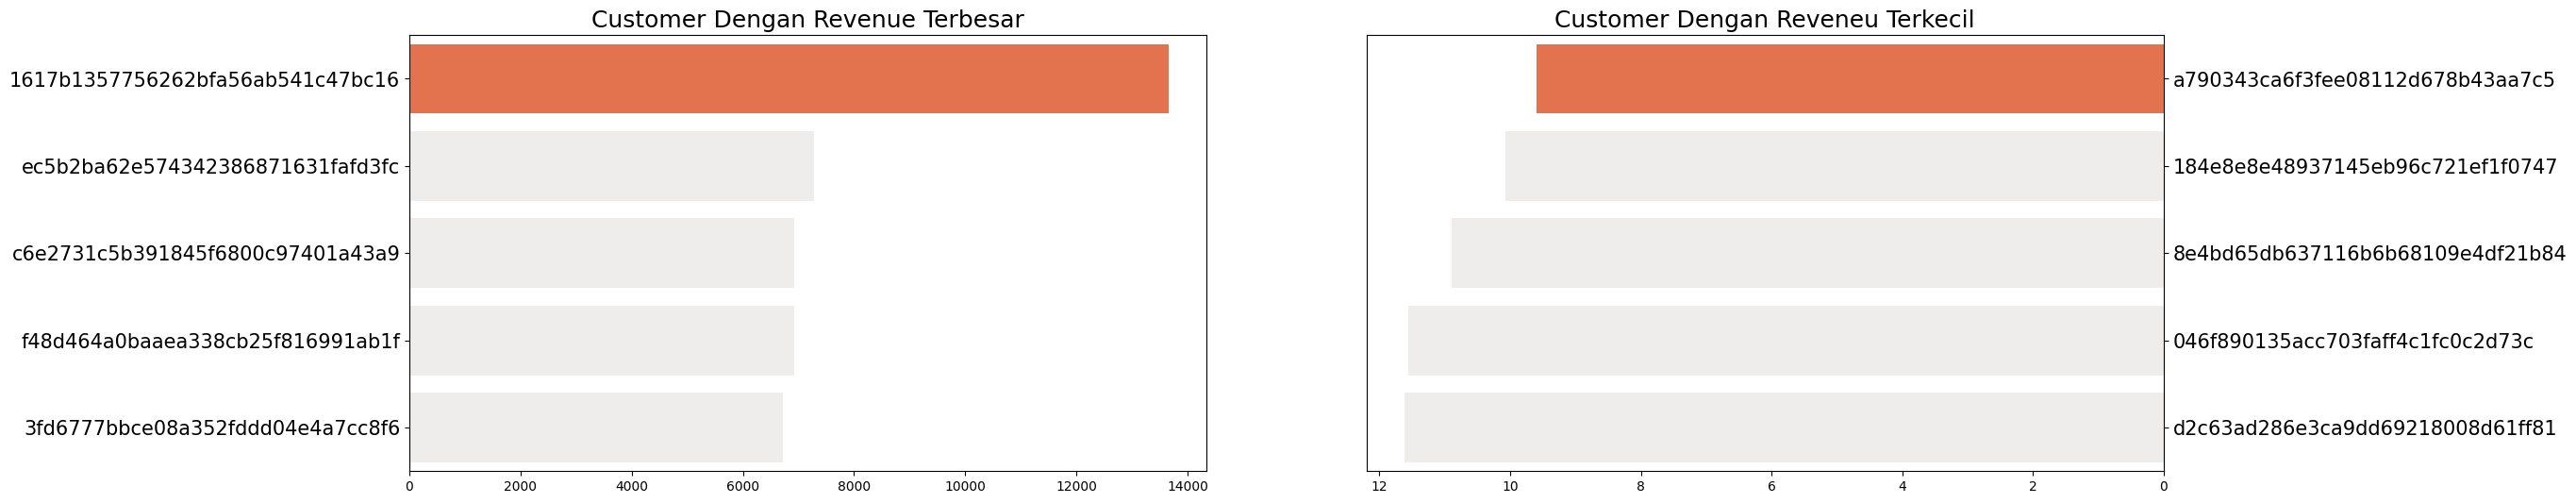

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FC6736", "#EFECEC", "#EFECEC", "#EFECEC", "#EFECEC"]

sns.barplot(x="payment_value", y="customer_id", data=total_payment_customer.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Customer Dengan Revenue Terbesar", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="payment_value", y="customer_id", data=total_payment_customer.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Customer Dengan Reveneu Terkecil", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

**Finding :** Berdasarkan grafik diatas, dapat disimpulkan bahwa pelanggan yang menghasilkan revenue terbesar adalah pelanggan yang memiliki ID **1617b1357756262bfa56ab541c47bc16** dengan total revenue sebesar **13,664.08** dan pelanggan yang menghasilkan revenue terkecil adalah pelanggan yang memiliki ID **a790343ca6f3fee08112d678b43aa7c5** dengan total revenue sebesar **9.59**.

#### Produk apa yang yang mempunyai penjualan terbanyak dan penjualan tersedikit?

In [ ]:
product_favorite_df.head(10)

,product_category_name,count
0,Bed Bath Table,3025
1,Sports Leisure,2867
2,Furniture Decor,2657
3,Health Beauty,2444
4,Housewares,2335
5,Auto,1900
6,Computers Accessories,1639
7,Toys,1411
8,Watches Gifts,1329
9,Telephony,1134


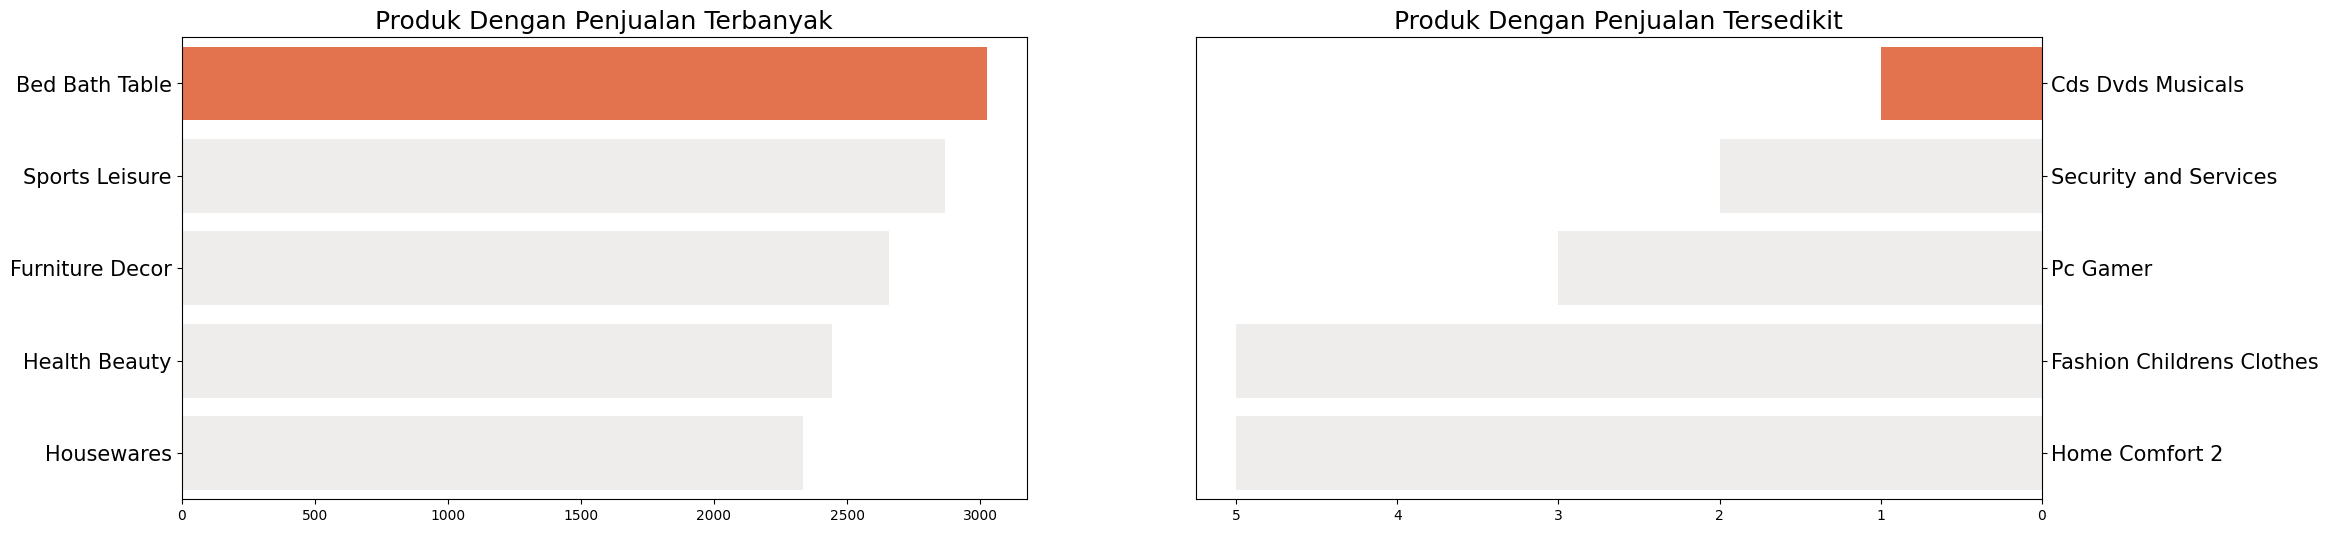

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FC6736", "#EFECEC", "#EFECEC", "#EFECEC", "#EFECEC"]

sns.barplot(x="count", y="product_category_name", data=product_favorite_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Dengan Penjualan Terbanyak", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="count", y="product_category_name", data=product_favorite_df.sort_values(by="count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Dengan Penjualan Tersedikit", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

**Finding :** Berdasarkan grafik diatas dapat disimpulkan bahwa produk yang memiliki penjualan terbanyak adalah produk dengan kategori **Bed Bath Table** dengan penjualan sebanyak **3,025** dan produk yang memiliki penjualan tersedikit adalah produk dengan kategori **Cds Dvds Musicals** dengan penjualan sebanyak **1**.

#### Produk apa yang yang mempunyai revenue penjualan tertinggi dan penjualan terrendah?

In [ ]:
total_payment_product.head(10)

,product_category_name,payment_value
7,Bed Bath Table,1710872.33
43,Health Beauty,1657373.12
15,Computers Accessories,1585330.45
39,Furniture Decor,1430176.39
72,Watches Gifts,1429216.68
67,Sports Leisure,1392127.56
49,Housewares,1094498.25
5,Auto,852294.33
42,Garden Tools,838280.75
20,Cool Stuff,779698.00


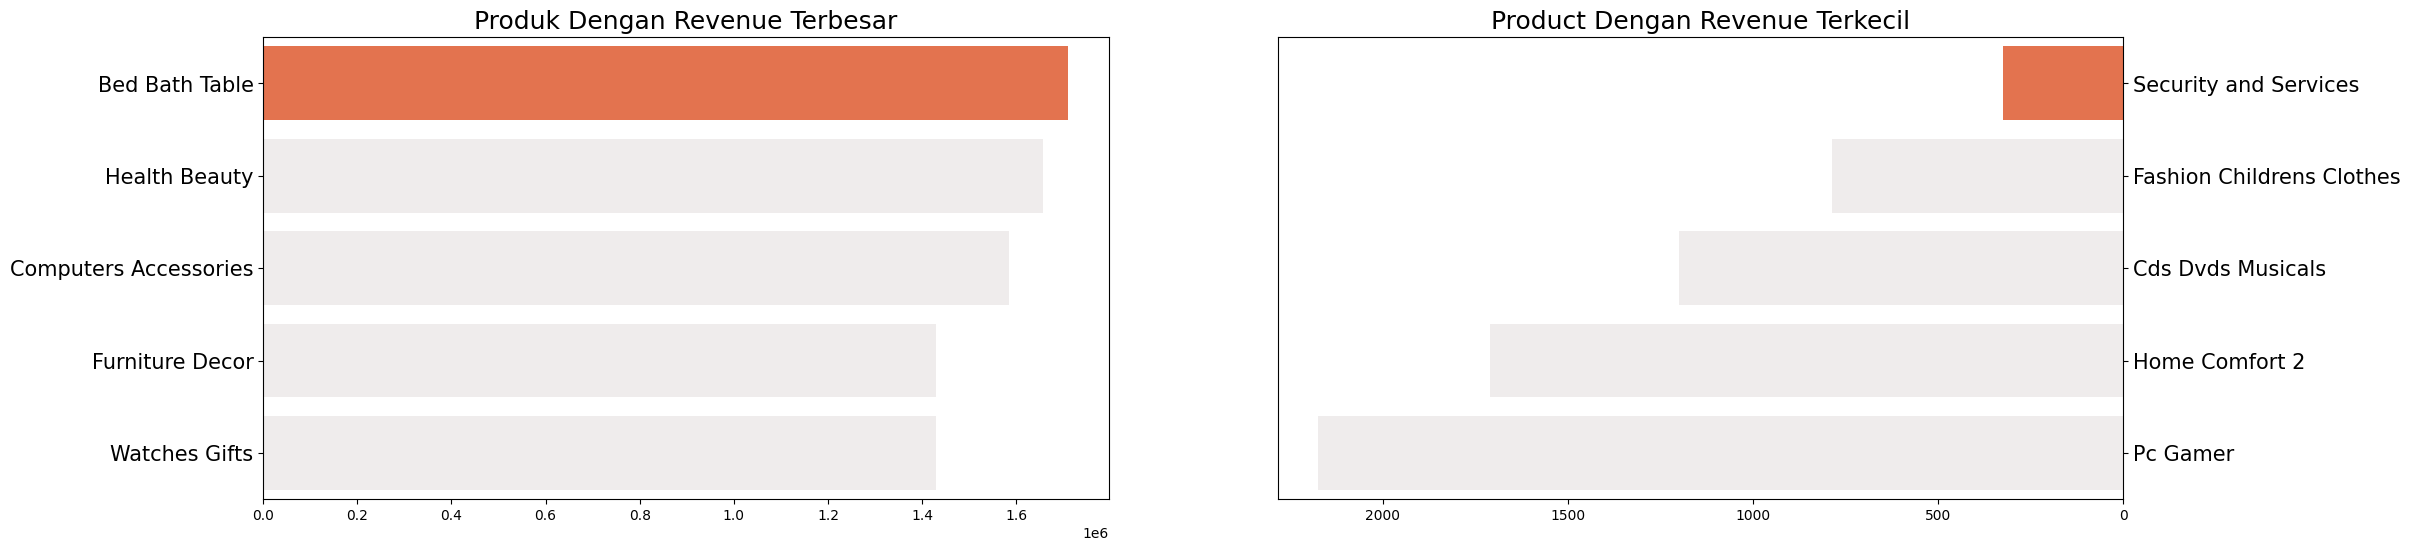

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FC6736", "#EFECEC", "#EFECEC", "#EFECEC", "#EFECEC"]

sns.barplot(x="payment_value", y="product_category_name", data=total_payment_product.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Dengan Revenue Terbesar", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="payment_value", y="product_category_name", data=total_payment_product.sort_values(by="payment_value", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Product Dengan Revenue Terkecil", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

**Finding :** Berdasarkan grafik diatas, dapat disimpulkan bahwa produk yang mempunyai revenue penjualan tertinggi adalah produk dengan kategori **Bed Bath Table** dengan total revenue sebesar **1,710,872.33** dan produk yang mempunyai revenue penjualan terendah adalah produk dengan kategori **Security and Services** dengan total revenue sebesar **324.51**

#### Produk apa yang mendapatkan rating tinggi dan produk apa yang mendapat rating rendah?

In [ ]:
total_rating_product.head(10)

,product_category_name,review_score
11,Cds Dvds Musicals,4.642857
29,Fashion Childrens Clothes,4.500000
8,Books General Interest,4.438503
35,Flowers,4.419355
9,Books Imported,4.419355
22,Costruction Tools Tools,4.415842
10,Books Technical,4.375465
37,Food Drink,4.324138
66,Small Appliances Home Oven and Coffee,4.320513
53,Luggage Accessories,4.295945


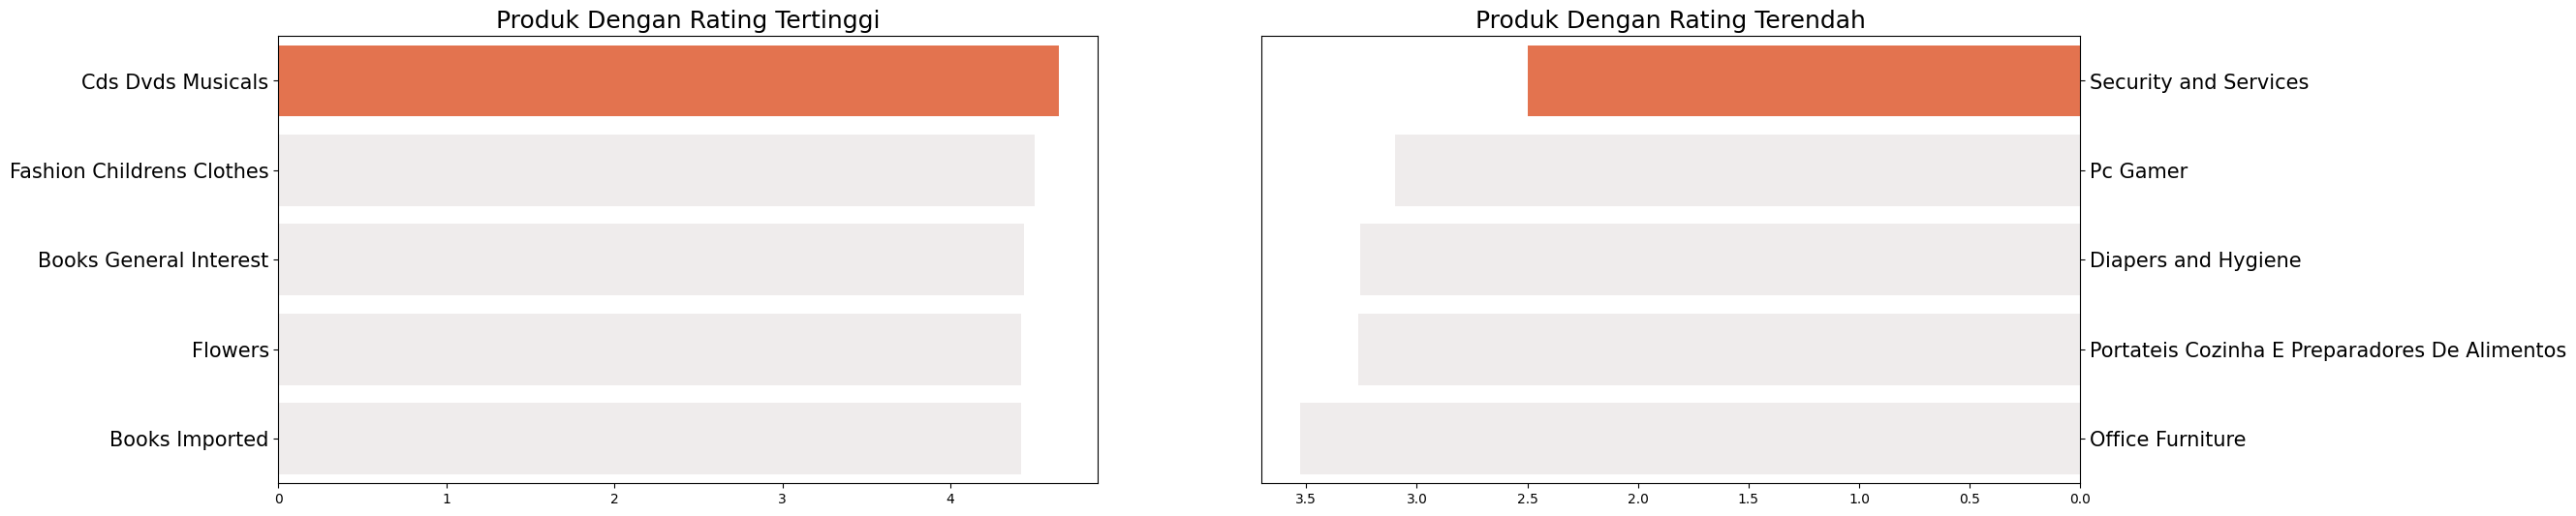

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FC6736", "#EFECEC", "#EFECEC", "#EFECEC", "#EFECEC"]

sns.barplot(x="review_score", y="product_category_name", data=total_rating_product.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Dengan Rating Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="review_score", y="product_category_name", data=total_rating_product.sort_values(by="review_score", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Dengan Rating Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.show()

**Finding :** Berdasarkan grafik diatas, dapat disimpulkan bahwa produk yang memiliki rating tertinggi adalah produk dengan kategori **Cds Dvds Musicals** dengan rata-rata rating sebesar **4.6** dan produk yang memiliki rating terendah adalah produk dengan kategori **Security and Services** dengan rata-rata rating sebesar **2.5**.

#### Berapa banyak pesanan yang dikirim sesuai estimasi dan berapa banyak yang melewati estimasi?

In [ ]:
status_delivery_df.head()

,status_delivery,count
0,On Time,91614
1,Late,7827


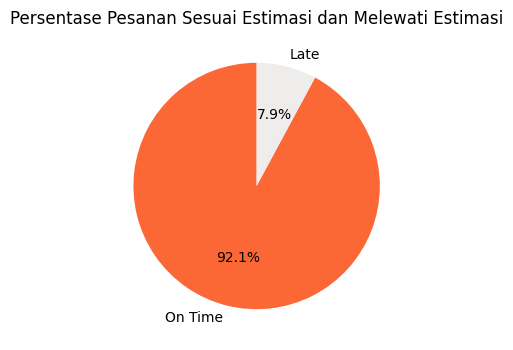

In [ ]:
plt.figure(figsize=(4, 4))
colors = ["#FC6736", "#EFECEC"]
plt.pie(status_delivery_df['count'], labels=status_delivery_df['status_delivery'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Persentase Pesanan Sesuai Estimasi dan Melewati Estimasi")
plt.show()

**Finding :** Berdasarkan grafik diatas, dapat disimpulkan bahwa pesanan yang **sesuai dengan estimasi** memiliki persentase sebesar **92.1%** dan pesanan yang **melewati estimasi** memiliki persentase sebesar **7.9%**.

### Metode pembayaran apa yang paling sering digunakan oleh pembeli, dan berapa total pendapatan yang dihasilkan?

In [ ]:
total_method.head()

,payment_type,total_usage,total_payment
1,Credit Card,85279,15300996.13
0,Boleto,22517,3984334.56
3,Voucher,6163,396244.12
2,Debit Card,1663,250506.86


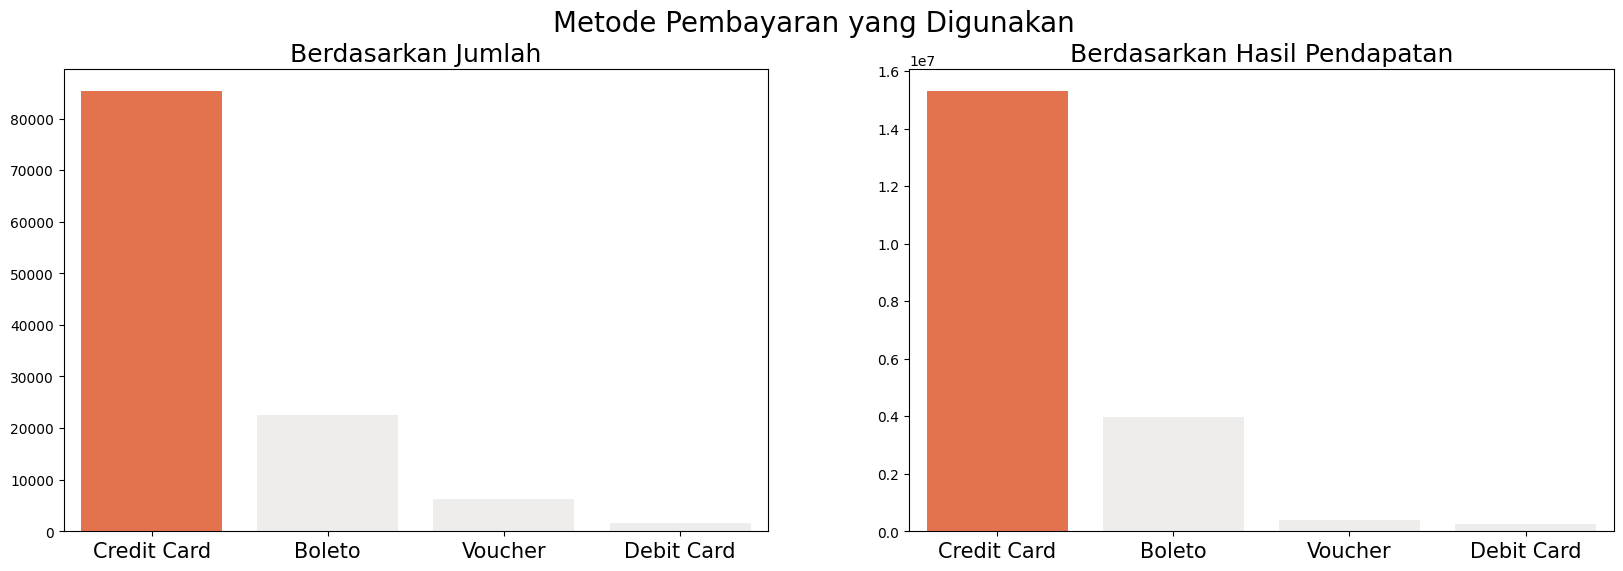

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

colors = ["#FC6736", "#EFECEC", "#EFECEC", "#EFECEC"]

sns.barplot(y="total_usage", x="payment_type", data=total_method.sort_values(by="total_usage", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Jumlah", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="total_payment", x="payment_type", data=total_method.sort_values(by="total_payment", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Hasil Pendapatan", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Metode Pembayaran yang Digunakan", fontsize=20)
plt.show()

**Finding :** Berdasarkan grafik diatas, dapat disimpulkan metode pembayaran yang sering digunakan dan yang memiliki revenue terbesar adalah **Credit Card** dengan total pemakaian sebanyak **85,279** dan total revenue sebesar **15,300,996.13**

# RFM Analysis
* Recency (Ketepatan): Mengukur seberapa baru pelanggan melakukan transaksi.
* Frequency (Frekuensi): Menilai seberapa sering pelanggan melakukan pembelian.
* Monetary (Moneter): Mengukur seberapa banyak uang yang dihabiskan pelanggan.

In [ ]:
merged_all2_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,Cool Stuff,58.0,598.0,...,Campos Dos Goytacazes,RJ,1,Credit Card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,Cool Stuff,58.0,598.0,...,Jatai,GO,1,Boleto,1,73.86,b11cba360bbe71410c291b764753d37f,5,2017-07-14,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,Cool Stuff,58.0,598.0,...,Belo Horizonte,MG,1,Credit Card,2,83.23,af01c4017c5ab46df6cc810e069e654a,4,2018-06-05,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,Cool Stuff,58.0,598.0,...,Sao Jose Dos Pinhais,PR,1,Credit Card,3,75.07,8304ff37d8b16b57086fa283fe0c44f8,5,2017-08-10,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,Cool Stuff,58.0,598.0,...,Conselheiro Lafaiete,MG,1,Credit Card,4,72.19,426f43a82185969503fb3c86241a9535,5,2017-08-25,2017-08-28 00:51:18


In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,On Time


In [ ]:
rfm_df = merged_all2_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96528 entries, 0 to 96527
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          96528 non-null  object        
 1   max_order_timestamp  96528 non-null  datetime64[ns]
 2   frequency            96528 non-null  int64         
 3   monetary             96528 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.9+ MB


In [ ]:
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])

In [ ]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,198


In [ ]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


In [ ]:
rfm_df.describe()

,frequency,monetary,recency
count,96528.0,96528.000000,96528.000000
mean,1.0,206.490155,288.821865
std,0.0,609.963832,153.423394
min,1.0,9.590000,44.000000
25%,1.0,62.977500,164.000000
50%,1.0,109.905000,269.000000
75%,1.0,196.920000,399.000000
max,1.0,109312.640000,773.000000


In [ ]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
28447,4b7decb9b58e2569548b8b4c8e20e8d7,1,166.46,44
6235,10a79ef2783cae3d8d678e85fde235ac,1,14.29,49
25820,448945bc713d98b6726e82eda6249b9e,1,2486.25,49
27660,496630b6740bcca28fce9ba50d8a26ef,1,33.23,49
31700,54365416b7ef5599f54a6c7821d5d290,1,106.95,49


In [ ]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
64349,aa5e341090958e5111abe3ba75bcfe87,1,109.12,215
64358,aa625e70d5e95d9b5c2c24e78fa0d75c,1,102.87,327
64357,aa6190994371836fc1d4596edd827abd,1,250.40,293
64356,aa606152f23a5fa9ba3d0b87f7a492e8,1,72.67,274


In [ ]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8316,1617b1357756262bfa56ab541c47bc16,1,109312.64,383
71980,be1b70680b9f9694d8c70f41fa3dc92b,1,44048.00,237
2010,05455dfa7cd02f13d132aa7a6a9729c6,1,36489.24,327
12080,1ff773612ab8934db89fd5afa8afe506,1,30186.00,181
89294,ec5b2ba62e574342386871631fafd3fc,1,29099.52,94


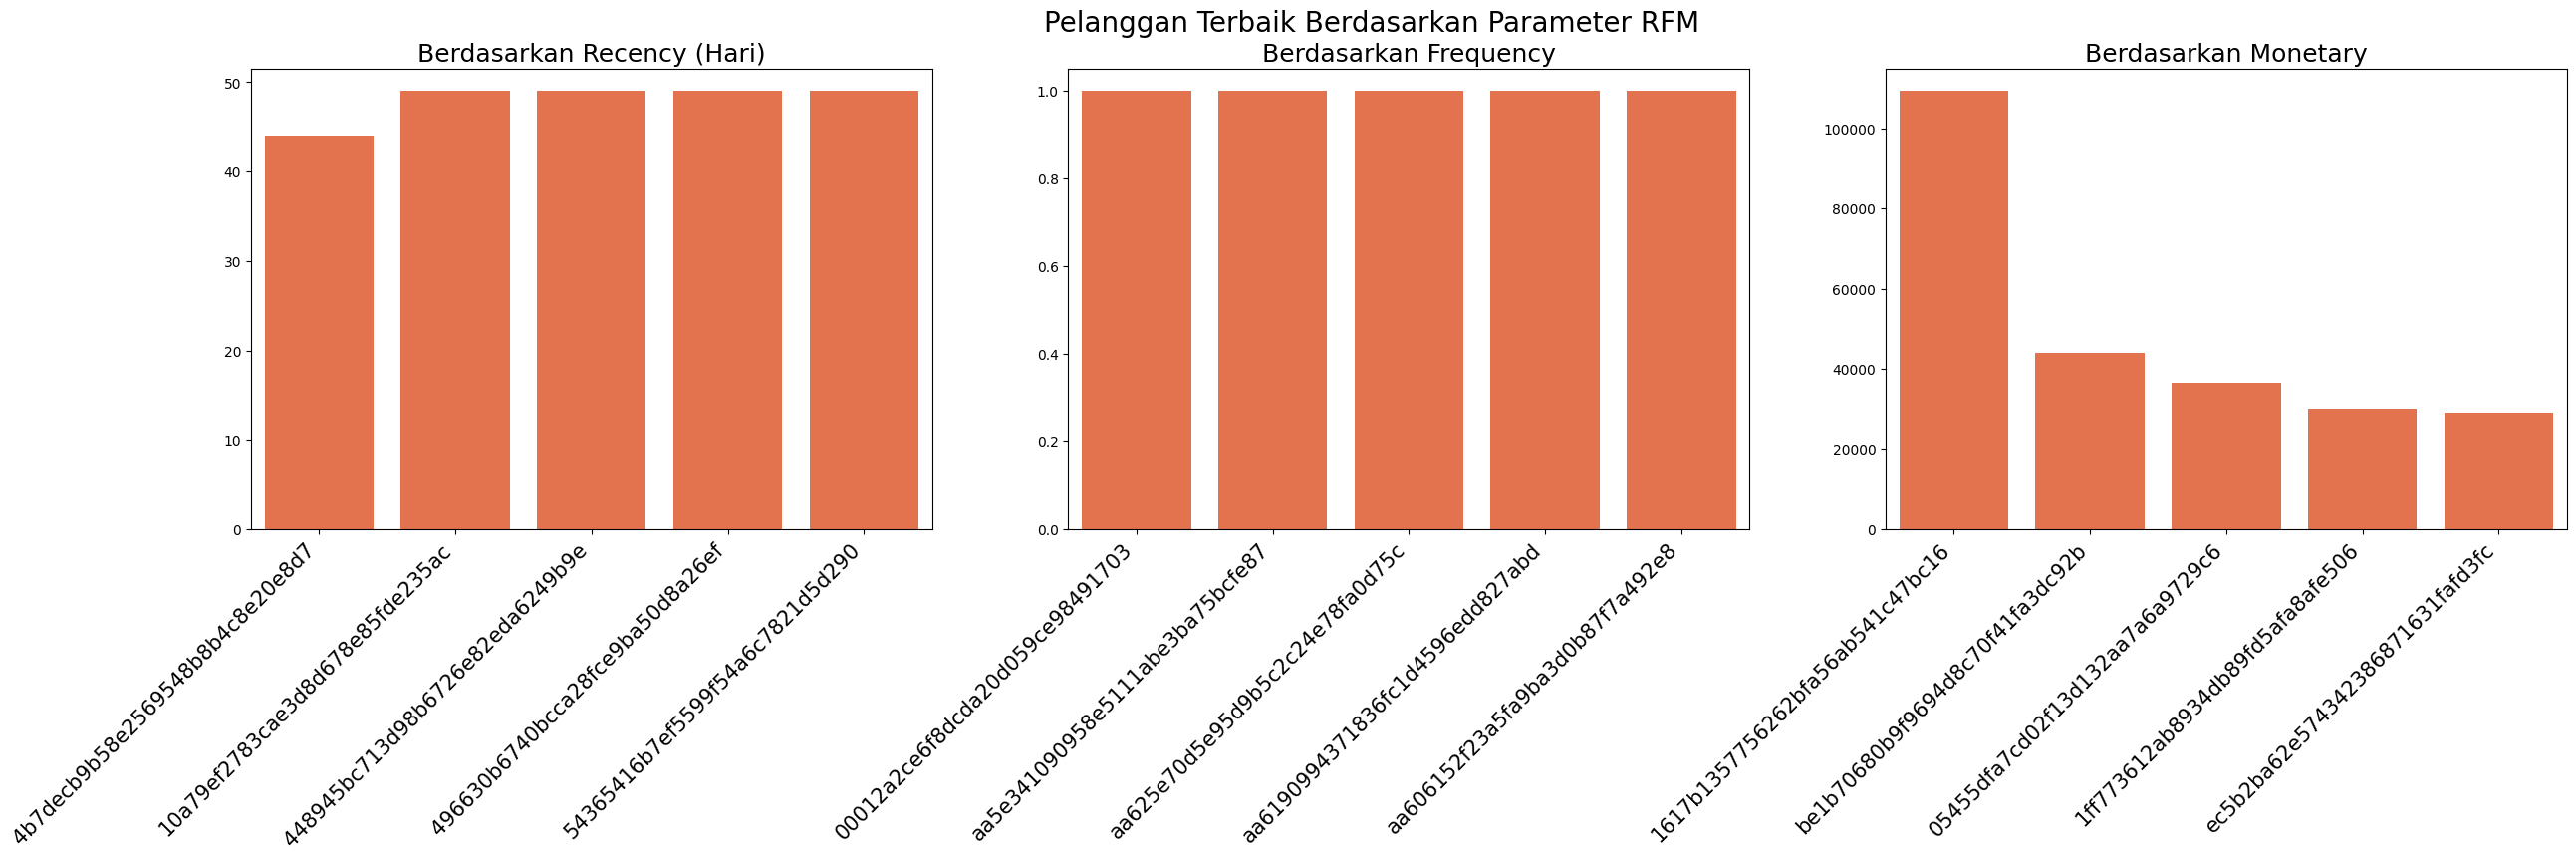

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#FC6736", "#FC6736", "#FC6736", "#FC6736", "#FC6736"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (Hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.show()

### Mengurutkan Customer Berdasarkan Recency, Frequency, & Monetary Score

In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=False)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=False)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,33085.5,48264.5,46401.0
1,000161a058600d5901f007fab4c27140,1,67.41,458,16155.5,48264.5,69321.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,2714.5,48264.5,24411.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,20339.5,48264.5,27371.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,64578.0,48264.5,49381.5


In [ ]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,34.275547,100.0,48.069990
1,000161a058600d5901f007fab4c27140,1,67.41,458,16.736595,100.0,71.814396
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,2.812137,100.0,25.289553
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,21.071088,100.0,28.355503
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,66.900796,100.0,51.157695


In [ ]:
rfm_df['rfm_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['rfm_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'rfm_score']].head(7)

,customer_id,rfm_score
0,00012a2ce6f8dcda20d059ce98491703,3.03
1,000161a058600d5901f007fab4c27140,3.57
2,0001fd6190edaaf884bcaf3d49edf079,2.14
3,0002414f95344307404f0ace7a26f1d5,2.37
4,000379cdec625522490c315e70c7a9fb,3.36
5,0004164d20a9e969af783496f3408652,3.42
6,000419c5494106c306a97b5635748086,4.23


### Segmentasi Customer Berdasarkan RFM Score

* Jika RFM_score lebih dari 4.5, pelanggan dianggap sebagai **"Top Customers"**.
* Jika RFM_score antara 4 dan 4.5, pelanggan dianggap sebagai **"High Value Customer"**.
* Jika RFM_score antara 3 dan 4, pelanggan dianggap sebagai **"Medium Value Customer"**.
* Jika RFM_score antara 1.6 dan 3, pelanggan dianggap sebagai **"Low Value Customers"**.
* Jika RFM_score kurang dari 1.6, pelanggan dianggap sebagai **"Lost Customers"**.

In [ ]:
rfm_df["customer_segment"] = np.where(
    rfm_df['rfm_score'] > 4.5, "Top Customers", (np.where(
        rfm_df['rfm_score'] > 4, "High Value Customer",(np.where(
            rfm_df['rfm_score'] > 3, "Medium Value Customer", np.where(
                rfm_df['rfm_score'] > 1.6, 'Low Value Customers', 'Lost customers'))))))

rfm_df[['customer_id', 'rfm_score', 'customer_segment']].head(5)

,customer_id,rfm_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.03,Medium Value Customer
1,000161a058600d5901f007fab4c27140,3.57,Medium Value Customer
2,0001fd6190edaaf884bcaf3d49edf079,2.14,Low Value Customers
3,0002414f95344307404f0ace7a26f1d5,2.37,Low Value Customers
4,000379cdec625522490c315e70c7a9fb,3.36,Medium Value Customer


In [ ]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High Value Customer,15398
1,Lost customers,938
2,Low Value Customers,40574
3,Medium Value Customer,34214
4,Top Customers,5404


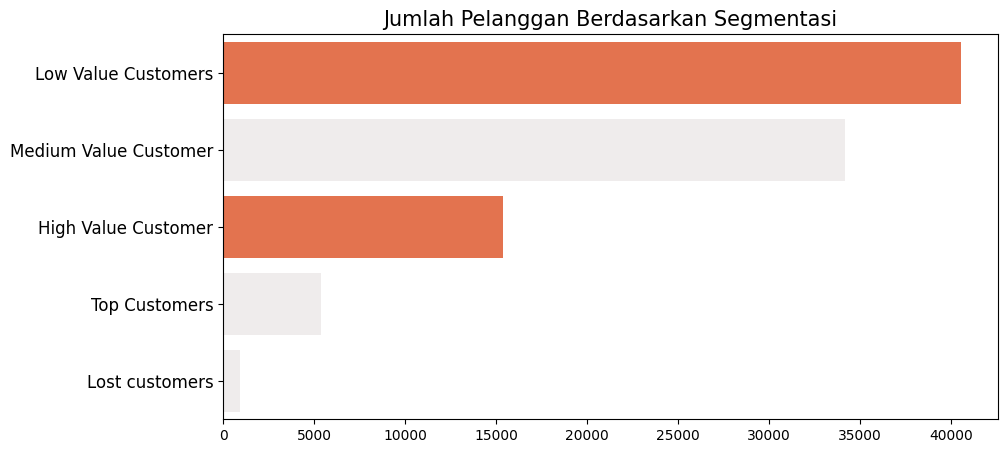

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#FC6736", "#EFECEC", "#FC6736", "#EFECEC", "#EFECEC"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_id", ascending=False),
    palette=colors_
)

plt.title("Jumlah Pelanggan Berdasarkan Segmentasi", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

# Conclusion

Setelah melakukan analisis, dapat disimpulkan bahwa jumlah pelanggan yang termasuk dalam **High Value Customer** lebih rendah dibandingkan dengan jumlah pelanggan berdasarkan **Low Value Customer**. Oleh karena itu, perlu dilakukan peninjauan ulang seperti:
* Memfokuskan beberapa daerah yang masih memiliki revenue rendah.
* Memberikan voucher atau hadiah kepada pembeli terbanyak.
* Memastikan produk yang diberikan sudah sesuai dengan keinginan pembeli.
* Memberikan arahan kepada seller agar dapat menyediakan produk yang lebih baik.

Dengan begitu, diharapkan dapat meningkatkan jumlah pelanggan dalam kategori High Value Customer.